## Learning Effects (Spatial Group)

* Do we see learning (increasing oracle use) in the spatial group over time?
* How does this compare between low and high IUS participants?

In [1]:
import os, sys
sys.path.append(os.path.dirname(os.path.realpath("./"))) # Add parent to path

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
from scipy.stats import linregress
from plots import bars
from util import cap
from constants import IUS_COLORS

In [2]:
plt.style.use("jg.mplstyle")

In [3]:
df_trials = pd.read_pickle('./frames/df_trials.pickle')
df_subjs = pd.read_pickle('./frames/df_subjs.pickle')

In [4]:
ius_median = np.median(df_subjs.ius_score)
for key, row in df_subjs.iterrows():
    ius_type = 'high' if row.ius_score > ius_median else 'low'
    df_subjs.loc[key, 'ius_type'] = ius_type
    # df_trials.loc[df_trials.match_id == key, 'ius_type'] = ius_type


In [5]:
for key, row in df_trials.iterrows():
    df_trials.loc[key, 'ius_type'] = df_subjs[df_subjs.user_id == row.user_id].iloc[0].ius_type

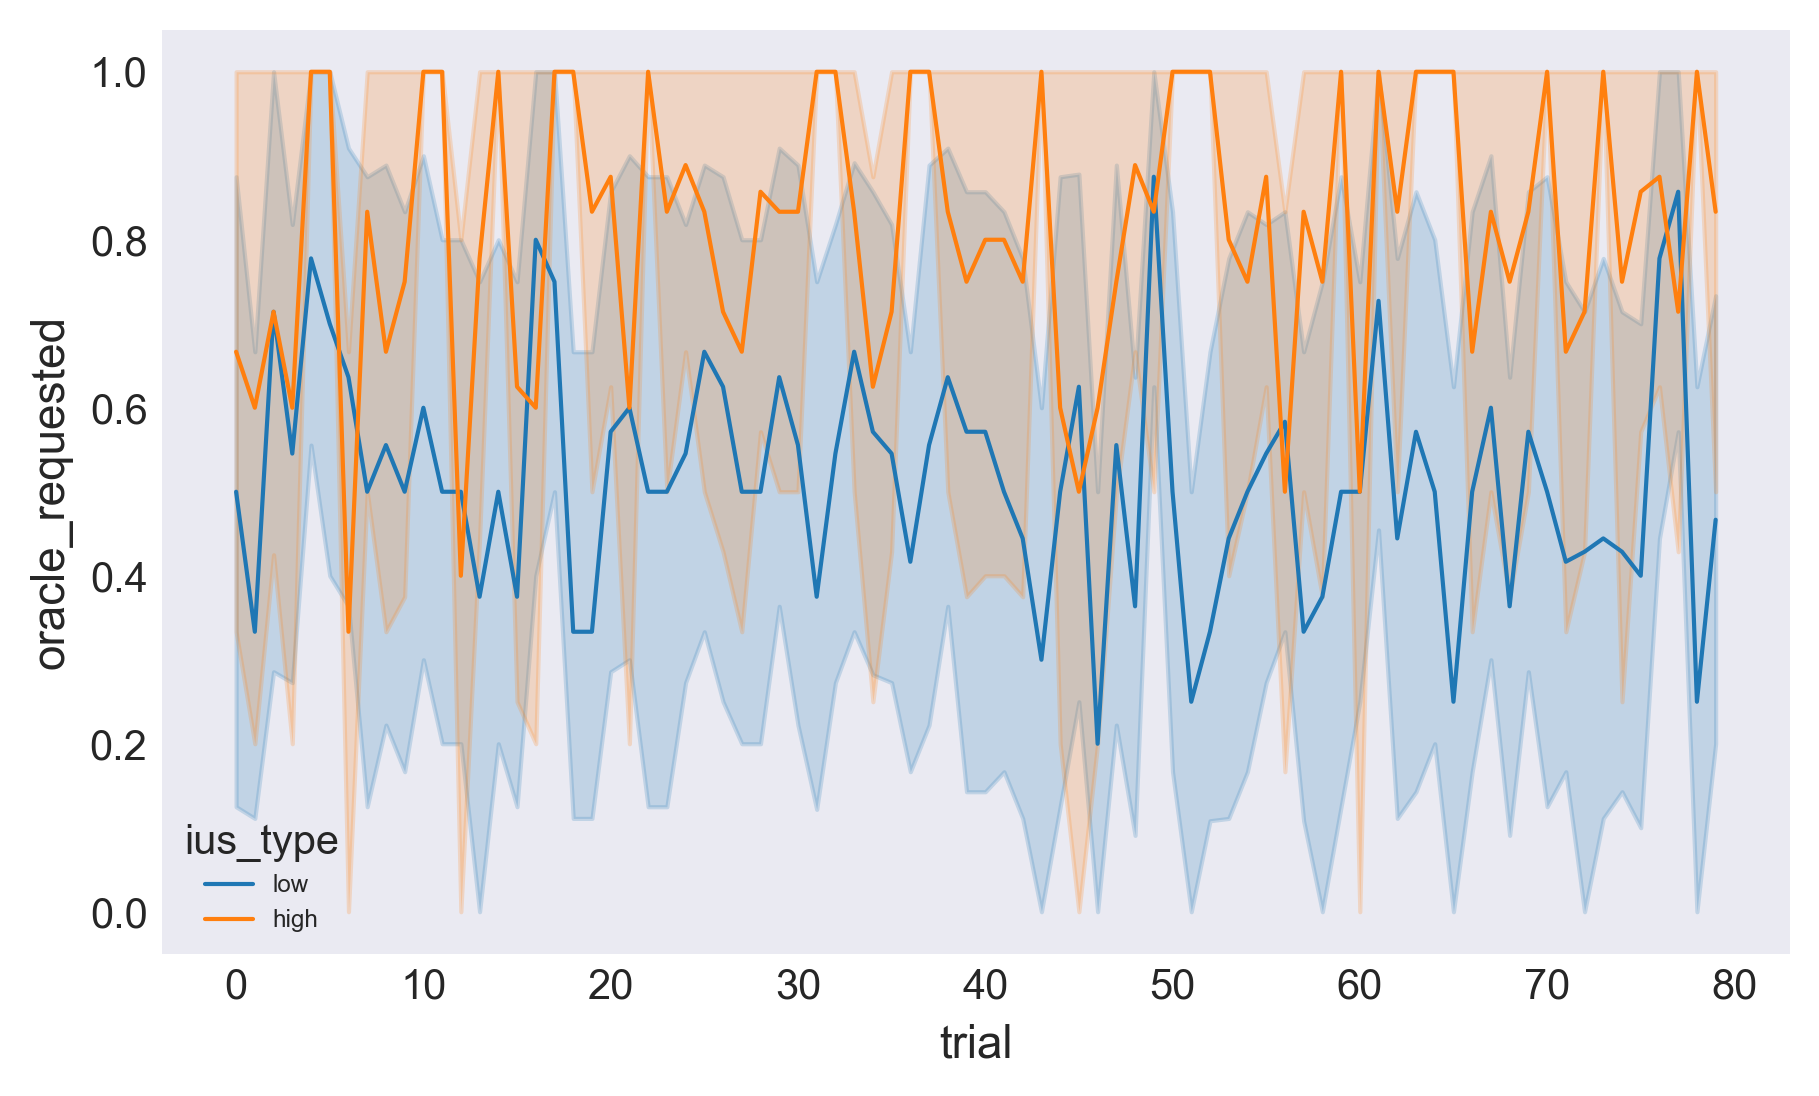

In [6]:
fig, ax = plt.subplots(dpi=300)
sns.lineplot(data=df_trials[(df_trials.map_kind == 'spatial') & (df_trials.cond_best_strat == "OF")], hue='ius_type', y='oracle_requested', x='trial', ax=ax)
plt.show()

In [7]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

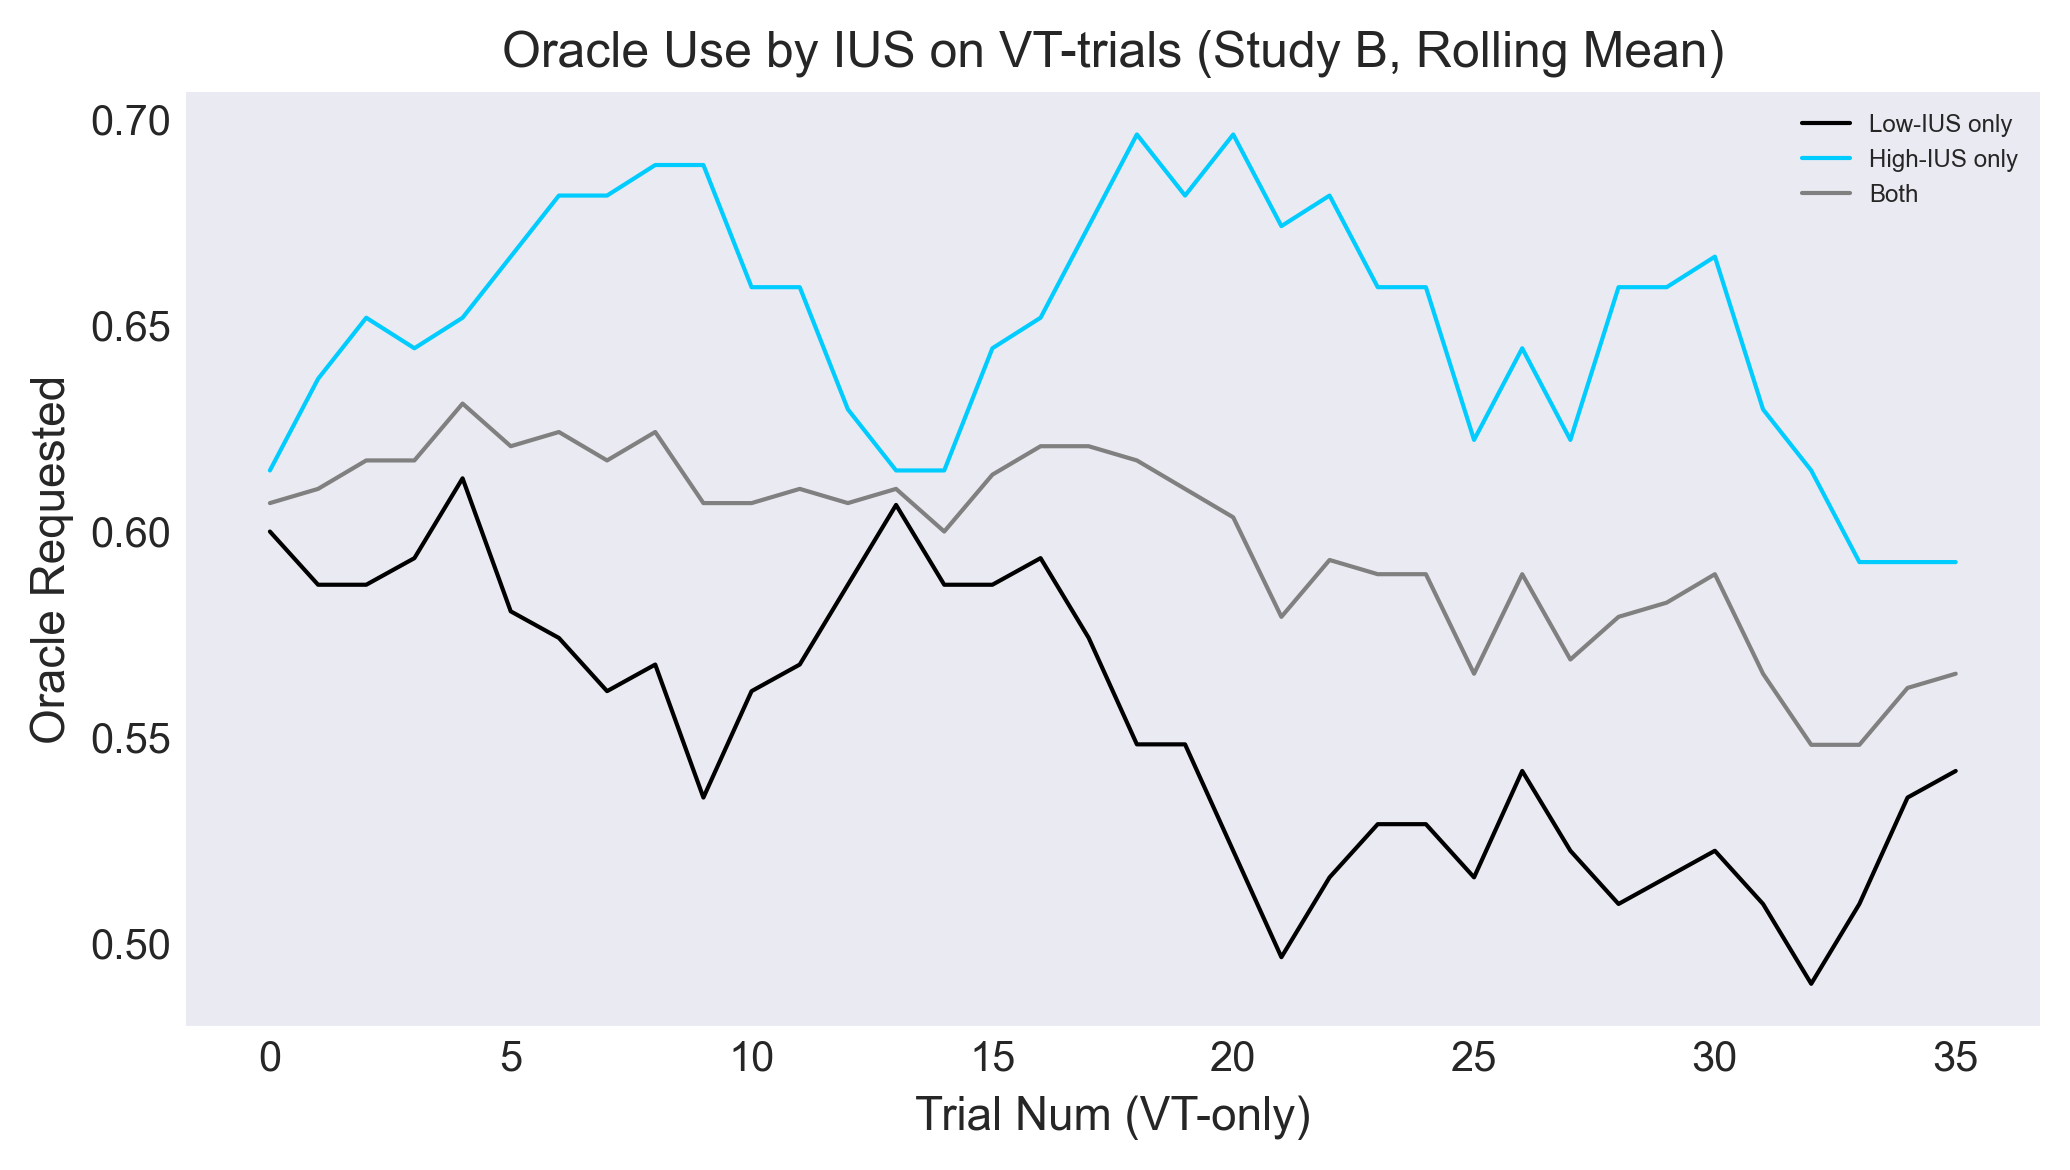

In [8]:
n_roll = 5
traces = {'low': [], 'high': []}  # low|high -> [array of arrays]
all_traces = []
for match_id, row in df_subjs.iterrows():
    match_trace = df_trials[(df_trials.match_id == match_id) & (df_trials.cond_best_strat == "OF")].oracle_requested.values.tolist()
    traces[row.ius_type].append(match_trace)
    all_traces.append(match_trace)
fig, ax = plt.subplots(dpi=300)

for ius_type, arrs in traces.items():
    rolling_average = moving_average(np.mean(arrs, axis=0), n=n_roll)
    xaxis = list(range(len(rolling_average)))
    ax.plot(xaxis, rolling_average, label=cap(ius_type) + "-IUS only", color=IUS_COLORS[ius_type])
rolling_average_both = moving_average(np.mean(all_traces, axis=0), n=n_roll)
ax.plot(xaxis, rolling_average_both, label="Both", color="gray")
ax.set_ylabel("Oracle Requested")
ax.set_xlabel("Trial Num (VT-only)")
ax.set_title("Oracle Use by IUS on VT-trials (Study B, Rolling Mean)")
plt.legend()
plt.tight_layout()
plt.savefig("./figures/oracle_trends_of_spatial_ius.png")
plt.show()
